<a href="https://colab.research.google.com/github/omerhac/cifar-100/blob/master/models_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a notebook for models performance testing

## Strating with a benchmark model and then going through a cycle of:
- Improvmemnt
- Performance evaluation
- Deciding what of the change to keep or discard

In [ ]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Benchmark model
Simple CNN model:
- Root: input and 32 filters Conv layer
- First block: maxpooling and 2 64 Conv layers
- Second block: maxpooling and 2 128 Conv layers
- Third block: maxpooling and 2 256 Conv layers
- flatten and dense layer with 1028 hidden units
- 100 classes softmax output
- default adam optimizer

Performance (best peak): 
- validation loss ~3
- validation accuracy ~0.28
- valdation top 5 accuracy ~0.56



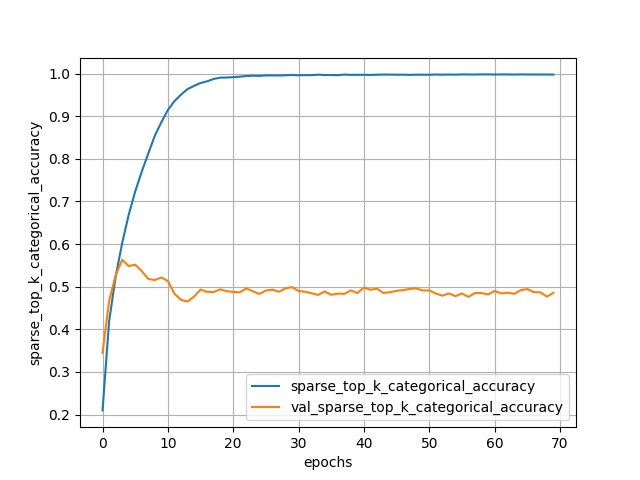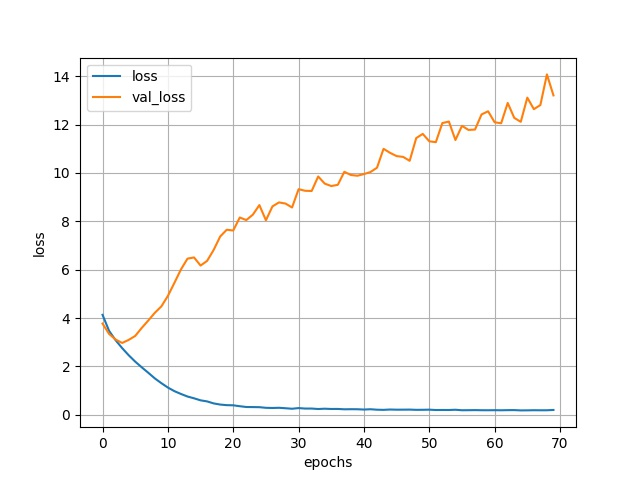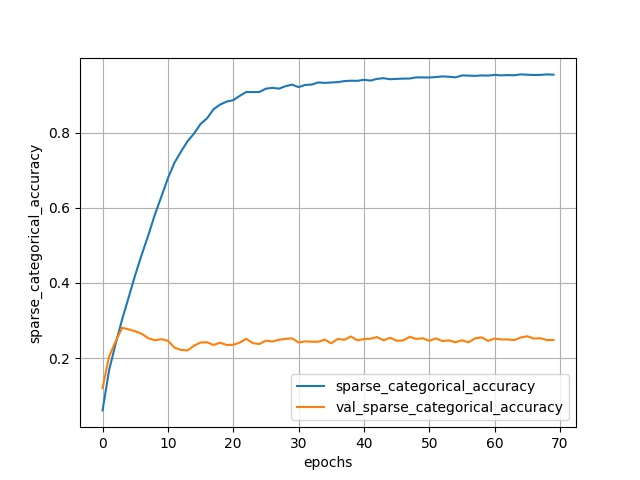

## Some thoghts and directions:
- Architecture: Ill try 2 design choices, Squeezenet style net and Inception style net. My intuition is that Squeezenet would work better cause of its much lower parameter number and the small number of examples per class. I think Inception will overfit.

- There are 500 images per data class. Thats a small amount. Thus, I think heavy data aumentation will really help (make more of the avilable data).

- One specific form of data augmentation that I plan on trying is partial image blackening. I imagine it as blocking the view for the model at random locations per image and thus getting more from every image.

- Another thing Ill try is to do pretraining on coarse labels. The dataset is partitioned to 20 super classes. I think doing pretraining on these will give the model some relevant information of shared features between classes.

## Squeezenet style net
Shared model architecture:
- 96 filter 5x5 conv
- 2 blocks of 2 FireModules followed by 3x3 maxpooling with 2x3 stride
- 1x1 conv layer
- Global average pooling
- Dense 100 classes softmax predictior

Design checks:
- 500 vs 1000 filters in last conv layer -> model complexity
- loosing the last maxpooling layer (at the end of the 2nd block) -> to much downsampling?
- Adding batch normalization -> works well on deep networks..


### 1000 filters model:
Performance (best peak)
- 2.8 validation loss
- 0.38 validation accuracy
- 0.63 top 5 validation accuracy


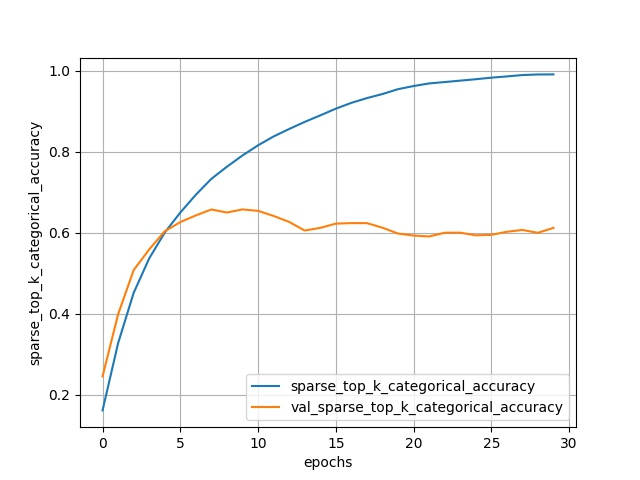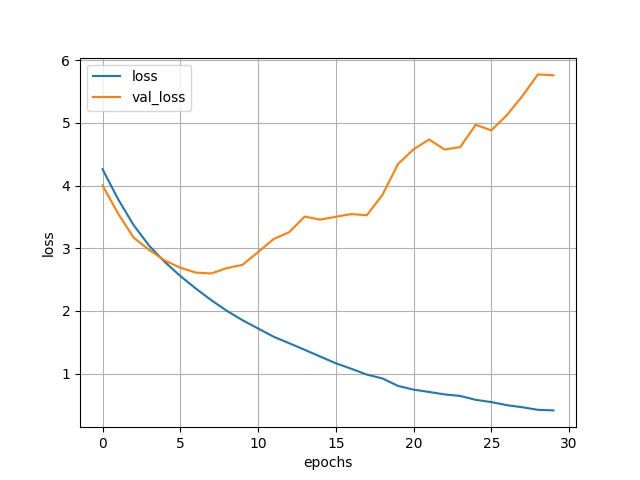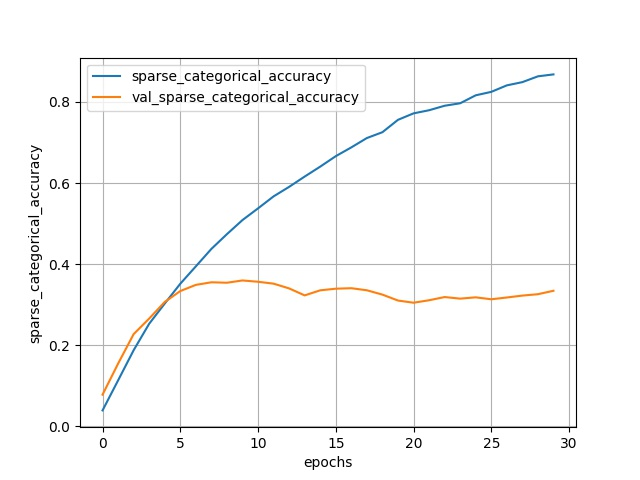

### 500 filters model:
Performance (best peak)
- 2.5 validation loss
- 0.4 validation accuracy
- 0.65 top 5 validation accuracy

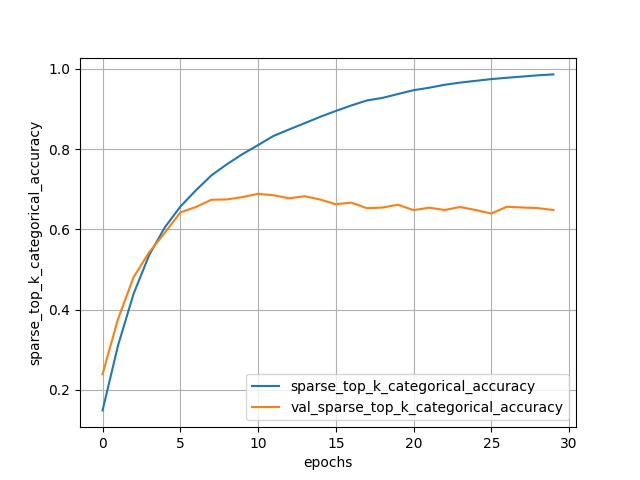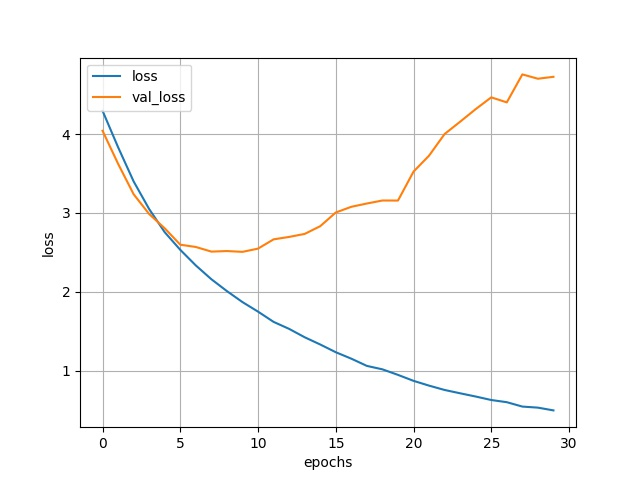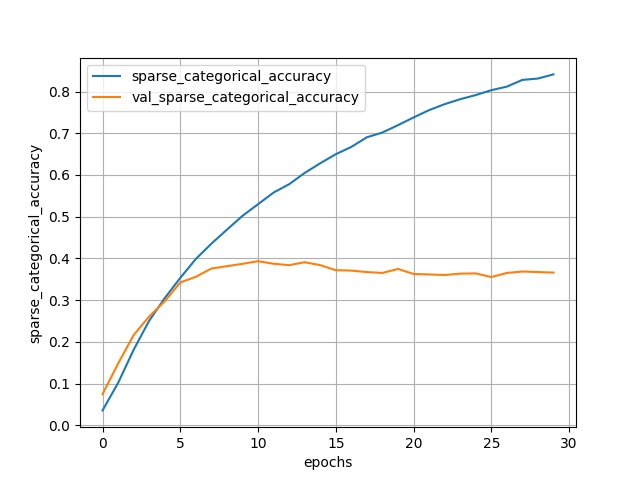

### No second maxpool layer model:
The model didn't even train...

### 1000 filters model with batch normalization
Performance (best peak)
- 2 validation loss
- 0.56 validation accuracy
- 0.82 top 5 validation accuracy

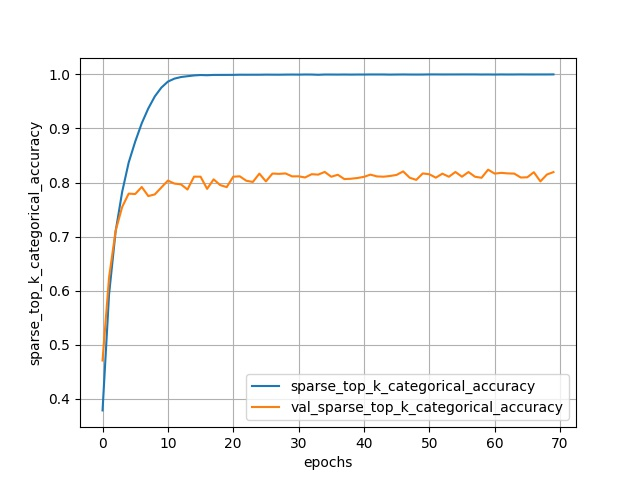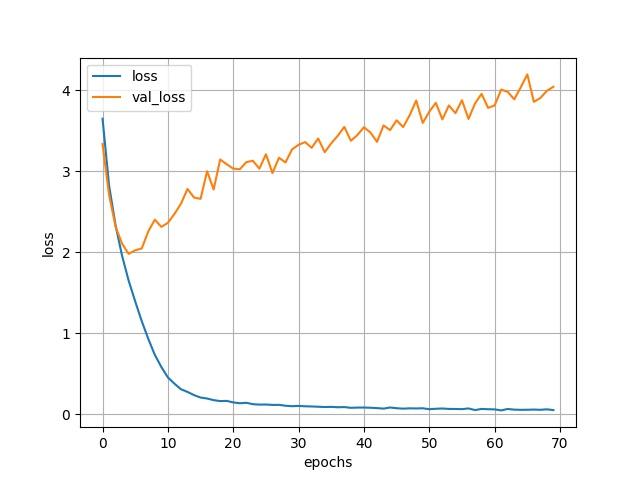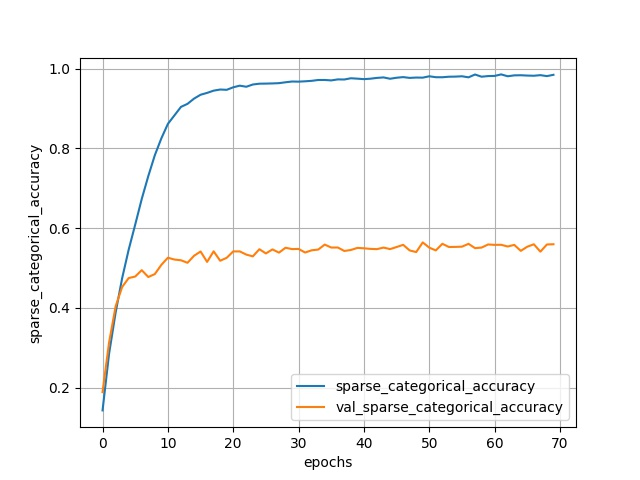

## Inception style net
Shared model architecture:
- 64 filter 5x5 conv
- 2 blocks of 2 InceptionModules followed by 3x3 maxpooling with 2x2 stride
- Global average pooling
- 40% dropout layer
- Dense 100 classes softmax predictior

Design checks:
- Adding a dense layer after the average pooling -> I think the network isnt deep enough to be fully convolutional

### No dense layer
Performance:
- validation loss - 2
- validation accuracy - 0.5
- validation top 5 accuracy 0.78

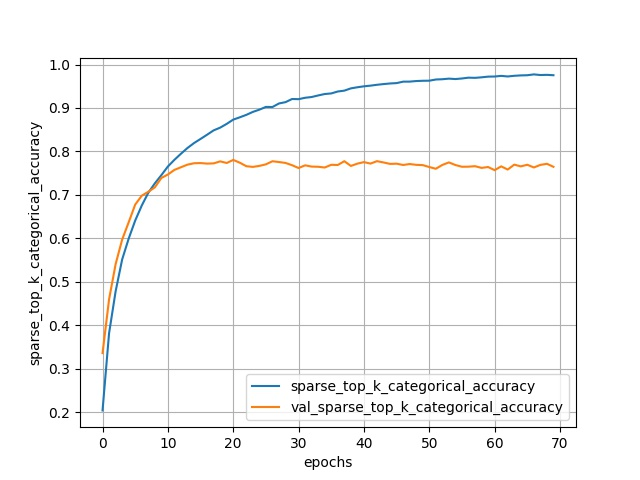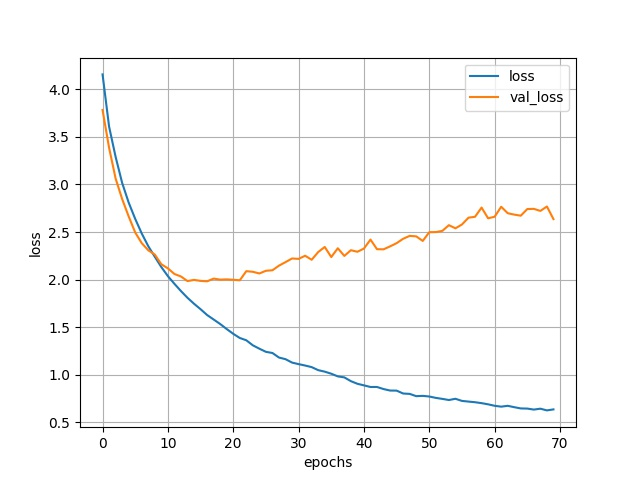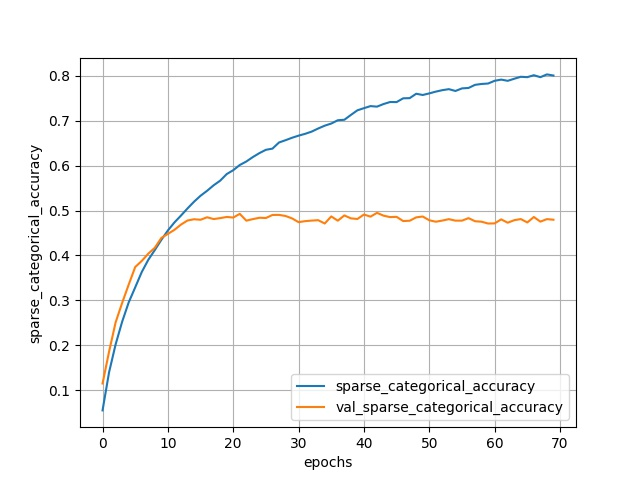

### With dense layer
Performance:
- validation loss - 2.2
- validation accuracy - 0.46
- validation top 5 accuracy 0.75

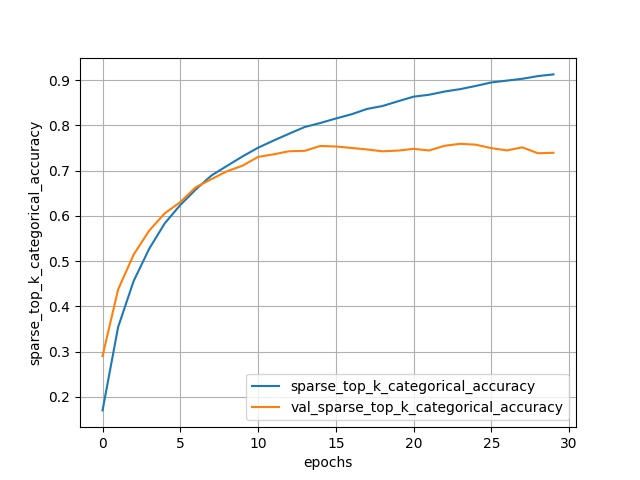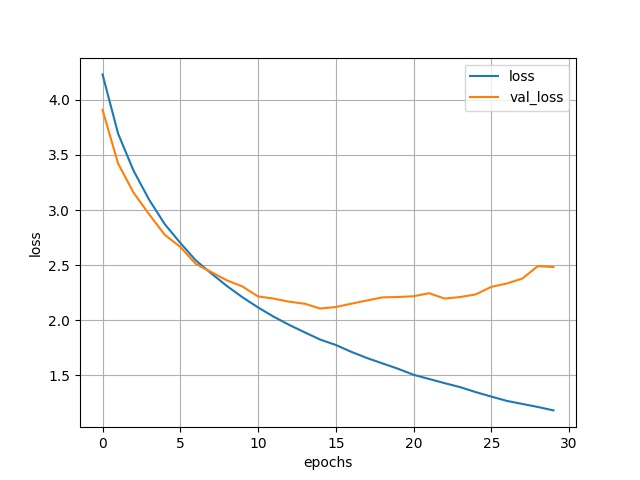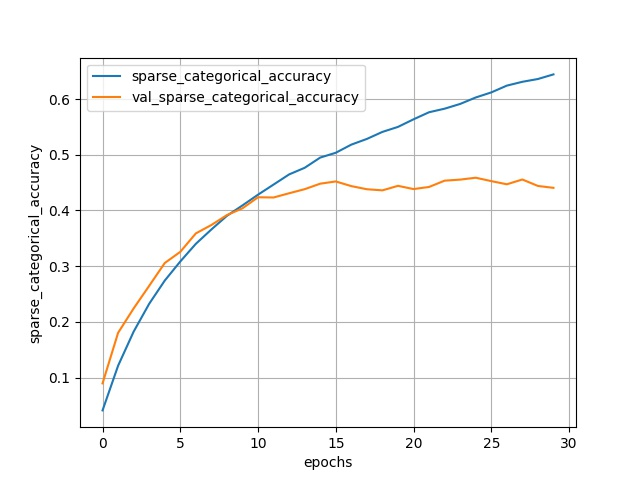